### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Reading data

In [2]:
census_data = pd.read_csv("census.csv")

In [4]:
census_data.dtypes

age                int64
workclass         object
final-weight       int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loos       int64
hour-per-week      int64
native-country    object
income            object
dtype: object

In [5]:
census_data

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
census_data.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
census_data.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

### Data visualization

In [9]:
np.unique(census_data['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

<Axes: xlabel='income', ylabel='count'>

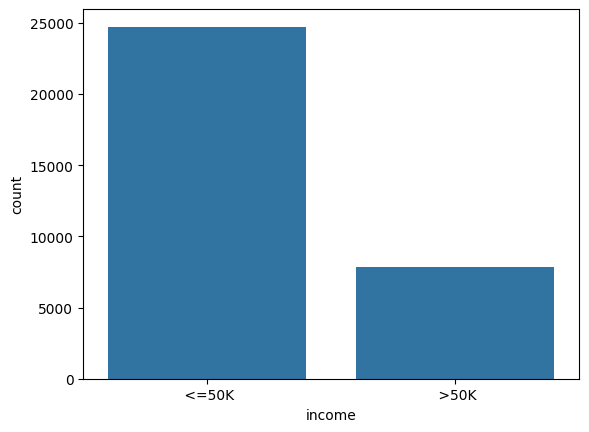

In [10]:
sns.countplot(x = census_data['income'])

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

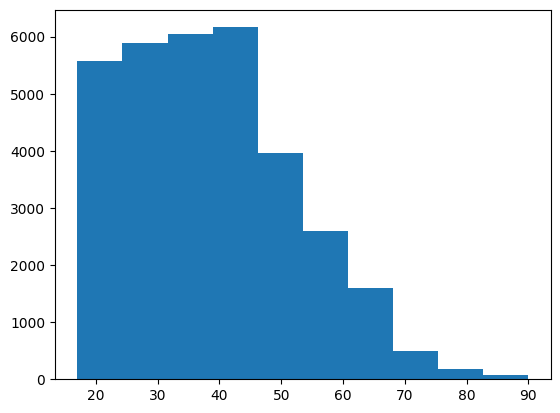

In [11]:
plt.hist(x = census_data['age'])

(array([  219.,   333.,  1160.,   933.,  1608., 10501.,  8673.,  1067.,
         7078.,   989.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

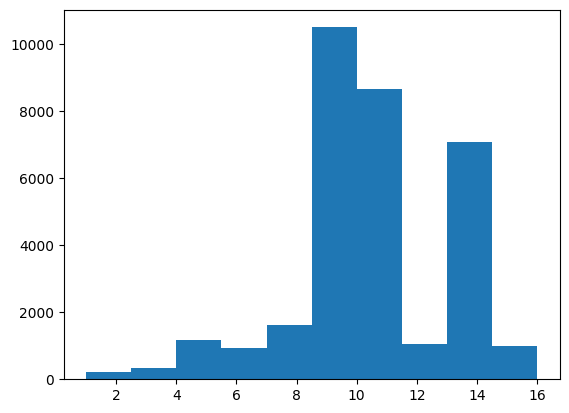

In [12]:
plt.hist(x = census_data['education-num'])

In [15]:
px.histogram(x = census_data['education'])

(array([  736.,  2192.,  2317., 17735.,  3119.,  3877.,  1796.,   448.,
          202.,   139.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

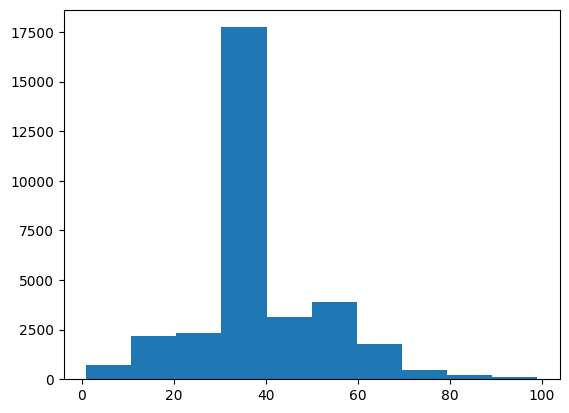

In [18]:
plt.hist(x = census_data['hour-per-week'])

In [21]:
px.treemap(census_data, path = ['workclass', 'education'])

In [22]:
px.treemap(census_data, path = ['occupation','education'])

In [35]:
px.parallel_categories(census_data, dimensions = ['sex','occupation'])

### Enchelon data for ml purpose

As some ml algorithms consider bigger values more important, is important to enchelon data (escalonar) by standardization (padronizar) or normalization (normalização). Otherwise, the model would consider some variables more important than other.

Standardization is recommended when outliers occurs.


In [3]:
x_census = census_data.iloc[:,0:14].values

In [38]:
x_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [4]:
y_census = census_data.iloc[:,14].values

In [40]:
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

### Treating categorical variables

Transform categorical into numeric (string to int or float) - label enconder

As some ml algorithms consider bigger values more important, is important to transform categorical data into dummy variables for each category. This part is applied after transformation from string to numeric - one hot enconder

In [5]:
from sklearn.preprocessing import LabelEncoder

In [15]:
x_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [17]:
label_enconder_workclass = LabelEncoder()
label_enconder_education = LabelEncoder()
label_enconder_maritalstatus = LabelEncoder()
label_enconder_occupation    = LabelEncoder()
label_enconder_relationship  = LabelEncoder()
label_enconder_race = LabelEncoder()
label_enconder_sex  = LabelEncoder()
label_enconder_nationality = LabelEncoder()

In [19]:
x_census[:,1]  = label_enconder_workclass.fit_transform(x_census[:,1])
x_census[:,3]  = label_enconder_education.fit_transform(x_census[:,3])
x_census[:,5]  = label_enconder_maritalstatus.fit_transform(x_census[:,5])
x_census[:,6]  = label_enconder_occupation.fit_transform(x_census[:,6])
x_census[:,7]  = label_enconder_relationship.fit_transform(x_census[:,7])
x_census[:,8]  = label_enconder_race.fit_transform(x_census[:,8])
x_census[:,9]  = label_enconder_sex.fit_transform(x_census[:,9])
x_census[:,13] = label_enconder_nationality.fit_transform(x_census[:,13])

In [20]:
x_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [23]:
onehot_encoder_census = ColumnTransformer(transformers = [("OneHote", OneHotEncoder(),[1,3,5,6,7,8,9,13])], 
                                                           remainder = 'passthrough') #passthrough doesn't erase original format

In [24]:
x_census = onehot_encoder_census.fit_transform(x_census).toarray()

In [26]:
x_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [28]:
x_census.shape

(32561, 108)

### Enchelon data for ml purpose

As some ml algorithms consider bigger values more important, is important to enchelon data (escalonar) by standardization (padronizar) or normalization (normalização). Otherwise, the model would consider some variables more important than other.

Standardization is recommended when outliers occurs.


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
x_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [31]:
scaler_census = StandardScaler()
x_census = scaler_census.fit_transform(x_census)

In [32]:
x_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

### Separating data into training and testing

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_census_training, x_census_test, y_census_training, y_census_test = train_test_split(x_census,y_census,
                                                                                      test_size = 0.15,
                                                                                      random_state = 0)

In [37]:
x_census_test.shape, x_census_training.shape, y_census_test.shape, y_census_training.shape

((4885, 108), (27676, 108), (4885,), (27676,))

### Exporting data

In [38]:
import pickle

In [41]:
with open('census.pkl', mode = 'wb') as f:
    pickle.dump([x_census_training, y_census_training, x_census_test, y_census_test], f)